# Математическая статистика

## Boxblot

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

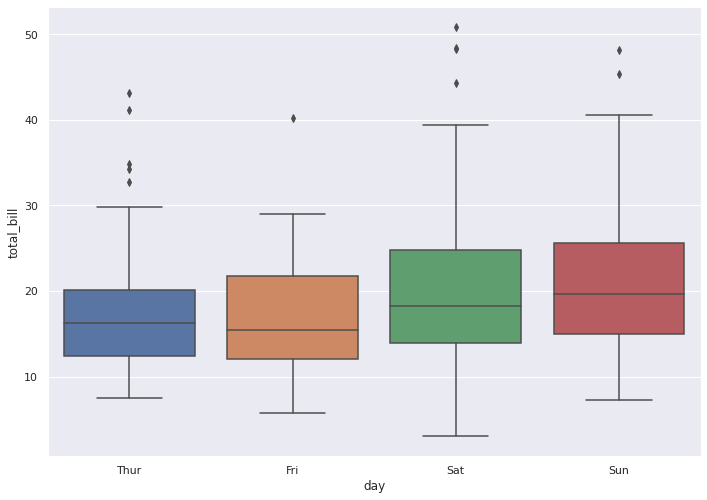

In [ ]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

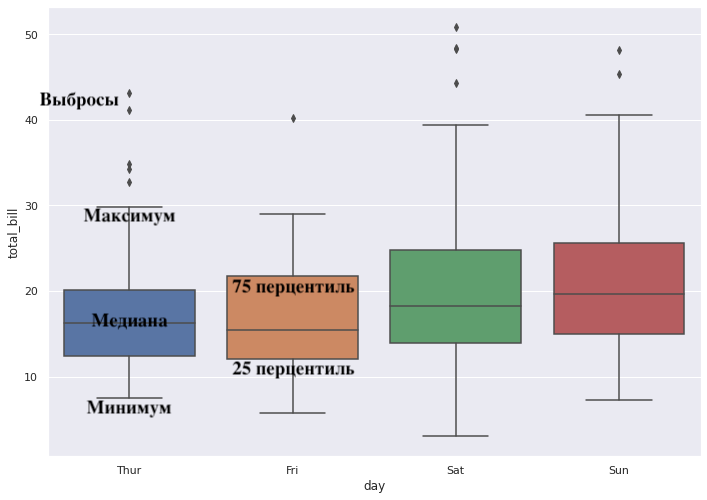

### Перцентиль против Квантиля против Квартиля

*   **Перцентиль** - от 0 до 100
*   **Квартиль** - от 0 до 4
* **Квантиль** - диапазон от любого значения до другого любого значения
* Процентили и квартили - это типы квантилей




*   0 процентиль = 0 квартиль (минимум)
*   25 процентиль = 1-ый квартиль
* 50 процентиль = 2-ой квартиль (медиана)
* 75 процентиль = 3-ий квартиль
* 100 процентиль = 4-ый квартиль (макcимум)



### Межквартильный метод

**Interquartile Range или IQR**  
IQR определяет средние 50% данных или иначе - тело данных  
IQR = Q3 -- Q1 (Q3 - 75 процентиль, Q1 - 25 процентиль)

In [ ]:
tips['total_bill'].quantile(0.5)

17.795

In [ ]:
tips['total_bill'].quantile(0.25)

13.3475

In [ ]:
tips['total_bill'].quantile(0.75)

24.127499999999998

In [ ]:
tips['total_bill'].quantile(0.75) - tips['total_bill'].quantile(0.25)

10.779999999999998

### Выбросы - как избавиться от них в наборе данных?



*   Q1 − 1.5 IQR
*   Q3 + 1.5 IQR



In [ ]:
import numpy as np

In [ ]:
q1 = np.percentile(tips['total_bill'], 25)
q3 = np.percentile(tips['total_bill'], 75)

iqr = q3 - q1
print(f'Q1 = {q1}, Q3 = {q3}, IQR = {iqr}')

Q1 = 13.3475, Q3 = 24.127499999999998, IQR = 10.779999999999998


In [ ]:
upper = tips[tips['total_bill'] >= (q3+1.5*iqr)]

upper


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [ ]:
lower = tips[tips['total_bill'] <= (q1-1.5*iqr)]

lower

,total_bill,tip,sex,smoker,day,time,size


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips[tips['day'] == 'Sat']['total_bill'].describe()

count    87.000000
mean     20.441379
std       9.480419
min       3.070000
25%      13.905000
50%      18.240000
75%      24.740000
max      50.810000
Name: total_bill, dtype: float64

In [ ]:
tips[tips['day'] == 'Sun']['total_bill'].describe()

count    76.000000
mean     21.410000
std       8.832122
min       7.250000
25%      14.987500
50%      19.630000
75%      25.597500
max      48.170000
Name: total_bill, dtype: float64

In [ ]:
tips[tips['day'] == 'Fri']['total_bill'].describe()

count    19.000000
mean     17.151579
std       8.302660
min       5.750000
25%      12.095000
50%      15.380000
75%      21.750000
max      40.170000
Name: total_bill, dtype: float64

In [ ]:
tips[tips['day'] == 'Thur']['total_bill'].describe()

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: total_bill, dtype: float64

## Гистограммы

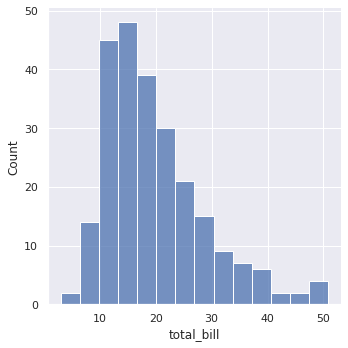

In [ ]:
sns.displot(tips['total_bill'])

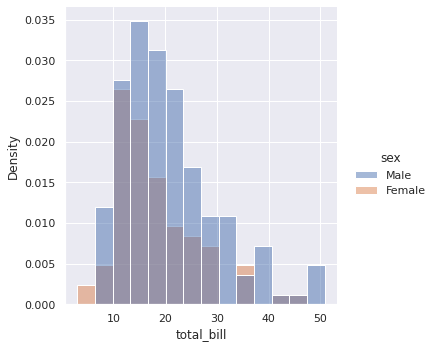

In [ ]:
sns.displot(data = tips, x = 'total_bill', hue = 'sex', stat = 'density')

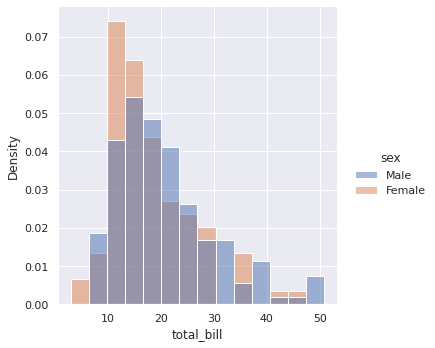

In [ ]:
sns.displot(data = tips, x = 'total_bill', hue = 'sex', stat = 'density', common_norm=False)

In [ ]:
tips_grouped = tips.groupby('day').count()['smoker']
tips_grouped

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: smoker, dtype: int64

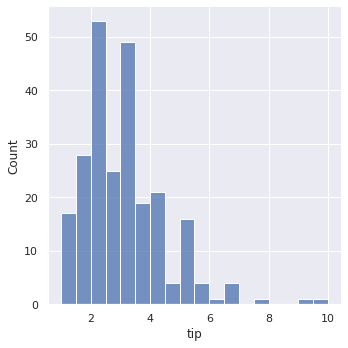

In [ ]:
sns.displot(data = tips, x = 'tip')

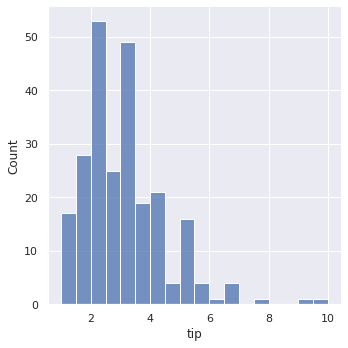

In [ ]:
sns.displot(data = tips, x = 'tip')

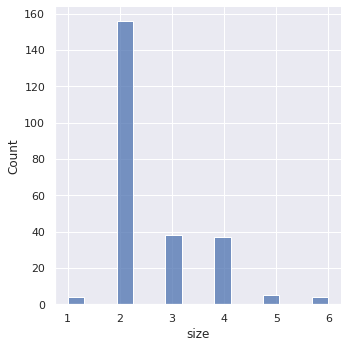

In [ ]:
sns.displot(data = tips, x = 'size')

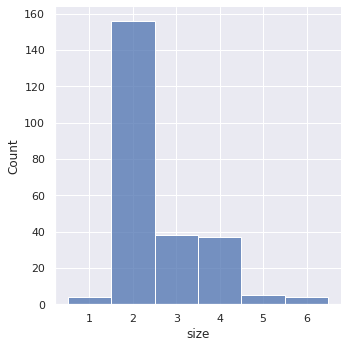

In [ ]:
sns.displot(data = tips, x = 'size', discrete = True)

In [ ]:
tips_rounded = tips.round({'tip': 0})
tips_rounded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.0,Female,No,Sun,Dinner,2
1,10.34,2.0,Male,No,Sun,Dinner,3
2,21.01,4.0,Male,No,Sun,Dinner,3
3,23.68,3.0,Male,No,Sun,Dinner,2
4,24.59,4.0,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,6.0,Male,No,Sat,Dinner,3
240,27.18,2.0,Female,Yes,Sat,Dinner,2
241,22.67,2.0,Male,Yes,Sat,Dinner,2
242,17.82,2.0,Male,No,Sat,Dinner,2


In [ ]:
tips_rounded.groupby('tip').count()

,total_bill,sex,smoker,day,time,size
tip,,,,,,
1.0,17,17,17,17,17,17
2.0,91,91,91,91,91,91
3.0,64,64,64,64,64,64
4.0,41,41,41,41,41,41
5.0,19,19,19,19,19,19
6.0,7,7,7,7,7,7
7.0,2,2,2,2,2,2
8.0,1,1,1,1,1,1
9.0,1,1,1,1,1,1


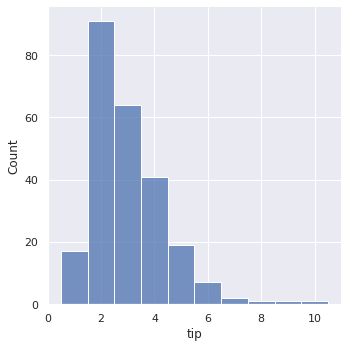

In [ ]:
sns.displot(data = tips_rounded, x = 'tip', discrete = True)

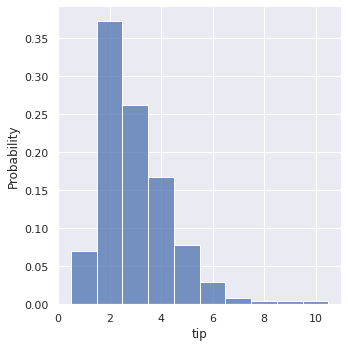

In [ ]:
sns.displot(data = tips_rounded, x = 'tip', stat = 'probability', discrete = True)

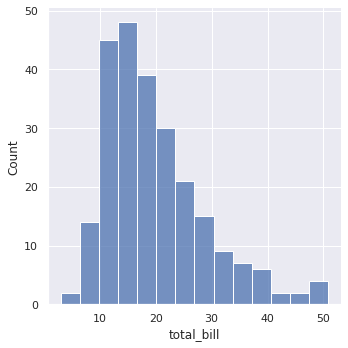

In [ ]:
#frequency density

sns.displot(data = tips, x = 'total_bill')

In [ ]:
tips.sort_values('total_bill', ascending = False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [ ]:
import numpy as np

conditions = [
    (tips['total_bill'] >= 3) & (tips['total_bill'] <= 19),
    (tips['total_bill'] >= 19) & (tips['total_bill'] <= 35),
    (tips['total_bill'] >= 35) & (tips['total_bill'] <= 51)]
choices = ['<19', '19-35', '>35']

tips['tip_group'] = np.select(conditions, choices, default='0')
tips

,total_bill,tip,sex,smoker,day,time,size,tip_group
0,16.99,1.01,Female,No,Sun,Dinner,2,<19
1,10.34,1.66,Male,No,Sun,Dinner,3,<19
2,21.01,3.50,Male,No,Sun,Dinner,3,19-35
3,23.68,3.31,Male,No,Sun,Dinner,2,19-35
4,24.59,3.61,Female,No,Sun,Dinner,4,19-35
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19-35
240,27.18,2.00,Female,Yes,Sat,Dinner,2,19-35
241,22.67,2.00,Male,Yes,Sat,Dinner,2,19-35
242,17.82,1.75,Male,No,Sat,Dinner,2,<19


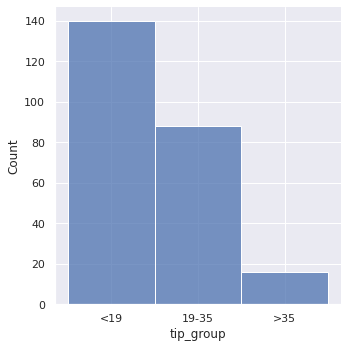

In [ ]:
sns.displot(data = tips, x = 'tip_group')

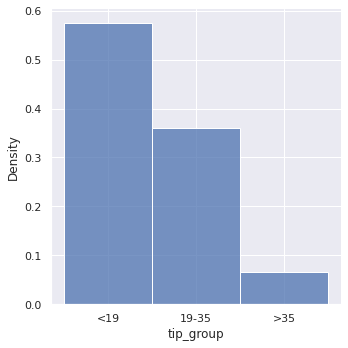

In [ ]:
sns.displot(data = tips, x = 'tip_group', stat = 'density')

## Биноминальное распределение

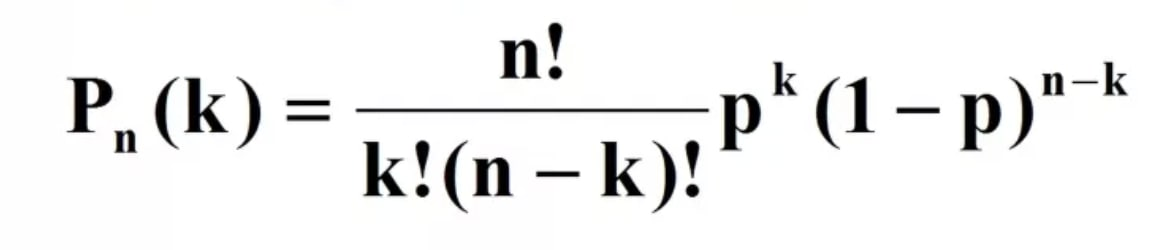

In [ ]:
from numpy import random

random.binomial(n=30, p=.25, size=10)

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

array([6, 9, 6, 3, 4, 8, 5, 8, 9, 9])

Максим Манчестеров забивает 60% голов в матчах. Если всего будет 5 голов за матч, какова вероятность того, что он забьет ровно 3?

In [ ]:
#Probability mass function
#функция вероятности

from scipy.stats import binom

binom.pmf(k= 3 , n= 5 , p= 0.6 )

0.3455999999999997

Известно, что 80% сотудников поддерживают 4-дневную рабочую неделю. Если наугад выбрать 20 человек, какова вероятность того, что 15 из них поддержат закон?

In [ ]:
#Cumulative distribution function
#функция распределения

from scipy.stats import binom

binom.cdf(k = 18 , n = 20 , p = 0.8 ) - binom.cdf(k = 15 , n = 20 , p = 0.8 ) 

0.5604729736262583

In [ ]:
#Cumulative distribution function
#функция распределения

from scipy.stats import binom

binom.cdf(k = 5 , n = 10 , p = 0.8 ) 

0.03279349759999997

In [ ]:
396704524216/17310309456440 

0.022917240458021564

In [ ]:
binom.cdf(k = 10 , n = 20 , p = 0.7 ) 

0.047961897331343525

В городе N живет 100 жителей. Компания хочет запустить рекламу нового сервиса на  площадке, которая обещает, что 70 жителей города увидят рекламу. Какая вероятность, что случайно выбранных 10 жителей города, после запуска рекламы, скажут, что видели ее? Ответ нужно вводить в формате десятичной дроби с 2 знаками после запятой.
